In [2]:
import xarray as xr
import hvplot.xarray #no.qa

In [13]:
DEFAULT_CMIP6_ROOT_URL = "http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp245/r1i1p1f2/day"
varurl = {
          'pr'    : DEFAULT_CMIP6_ROOT_URL +'/'+ 'pr'     +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'pr_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc',
          'rsds'  : DEFAULT_CMIP6_ROOT_URL +'/'+ 'rsds'   +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'rsds_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc',
          'uas'   : DEFAULT_CMIP6_ROOT_URL +'/'+ 'uas'    +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'uas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc',
          'vas'   : DEFAULT_CMIP6_ROOT_URL +'/'+ 'vas'    +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'vas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc',
          'tasmin': DEFAULT_CMIP6_ROOT_URL +'/'+ 'tasmin' +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'tasmin_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc',
          'tasmax': DEFAULT_CMIP6_ROOT_URL +'/'+ 'tasmax' +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'tasmax_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc',
          'tas'   : DEFAULT_CMIP6_ROOT_URL +'/'+ 'tas'    +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'tas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc',
          'hurs'  : DEFAULT_CMIP6_ROOT_URL +'/'+ 'hurs'   +'/'+ 'gr' +'/'+ 'v20190328' +'/'+ 'hurs_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc'
          }

In [18]:
dstas = xr.open_dataset(varurl['pr'])

RuntimeError: Failed to decode variable 'time': NetCDF: DAP failure

In [15]:
ds_all = xr.open_mfdataset(varurl.values(), compat='override')

ValueError: cannot do wild-card matching for paths that are remote URLs unless engine='zarr' is specified. Got paths: http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp245/r1i1p1f2/day/pr/gr/v20190328/pr_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231.nc. Instead, supply paths as an explicit list of strings.

## Dataset exploration

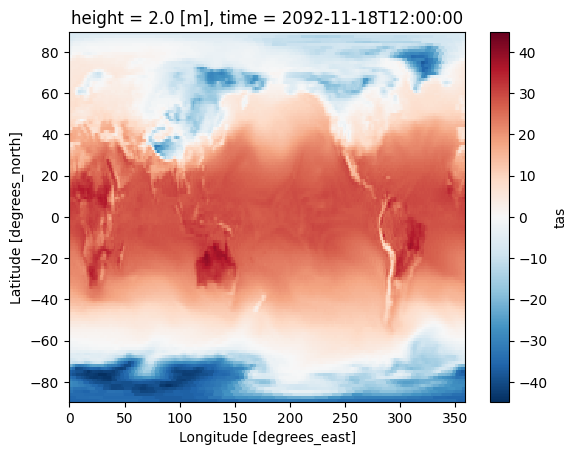

In [13]:
(ds_all['tas'].sel(time="2092-11-18", method="nearest")-273.15).plot();

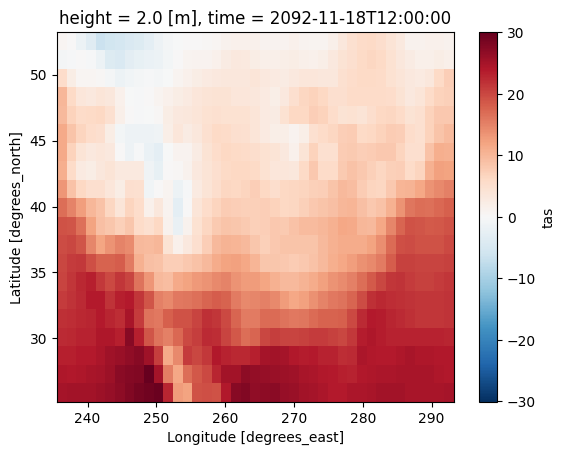

In [16]:
(ds_all['tas'].sel(time="2092-11-18", method="nearest").sel(lon=slice(235.0625, 292.9375), lat=slice(25.0625,52.9375))-273.15).plot();

In [21]:
(-89.1+360) % 360

270.9

In [25]:
ds_all['tas'].sel(lat=34.1, lon=((-89.1+360) % 360), method='nearest').hvplot(tools=['hover', 'xbox_zoom', 'box_zoom']) * ds_all['tasmin'].sel(lat=34.1, lon=((-89.1+360) % 360), method='nearest').hvplot(tools=['hover', 'xbox_zoom', 'box_zoom']) * ds_all['tasmax'].sel(lat=34.1, lon=((-89.1+360) % 360), method='nearest').hvplot(tools=['hover', 'xbox_zoom', 'box_zoom'])

c:\Users\Luc\projects\pyagnps\.venv\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\Luc\projects\pyagnps\.venv\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Overlay
   .Curve.I   :Curve   [time]   (tas)
   .Curve.II  :Curve   [time]   (tasmin)
   .Curve.III :Curve   [time]   (tasmax)

In [11]:
(ds_all['pr'].sel(lat=34.1, lon=((-89.1+360) % 360), method='nearest')*3600*24).hvplot(tools=['hover', 'xbox_zoom', 'box_zoom'])

c:\Users\Luc\projects\pyagnps\.venv\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
c:\Users\Luc\projects\pyagnps\.venv\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [time]   (pr)

## AnnAGNPS climate workflow

### Using OpenDAP

In [17]:
lat, lon = 34.1, -89.1

# Set lon in the [0, 360] range
lon = (lon + 360) % 360

startDate = "2050-01-01"
endDate = "2050-12-31"

In [18]:
ds_all['pr'].sel(lat=lat, lon=lon, method='nearest').sel(time=slice(startDate, endDate)).plot()

RuntimeError: NetCDF: DAP failure